Calculating the volume of the n-dim sphere via Monte-Carlo integration

Calculating the volume of the n-dimensional sphere by simple Monte Carlo integration
Different sample sizes N to check for 1/sqrt(N) MC convergence:  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
Dim 2
Analytical result 3.141592653589793
convergence N^ -0.4916044523717068


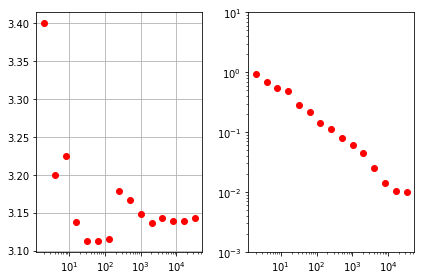

Dim 3
Analytical result 4.188790204786391
convergence N^ -0.4981624447680283


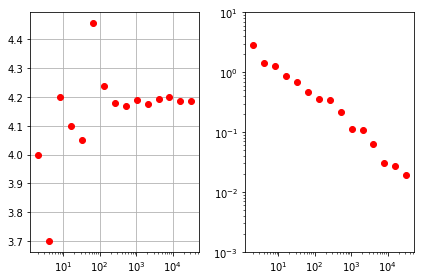

Dim 4
Analytical result 4.934802200544679
convergence N^ -0.4707360390126648


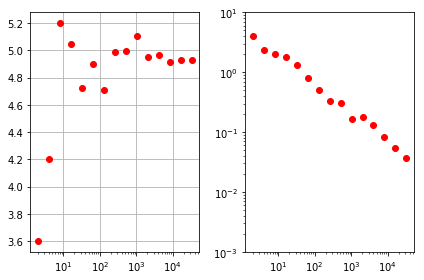

Dim 5
Analytical result 5.263789013914324
convergence N^ -0.532119119686371


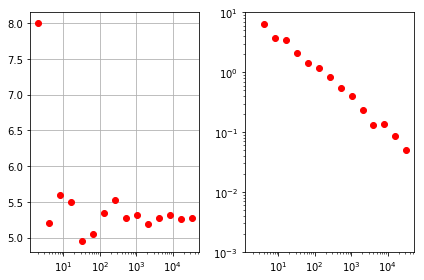

In [6]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(15)

ensembles = 20
ensembleSizes = [np.power(2,k) for k in np.arange(1,16) ]

print('Calculating the volume of the n-dimensional sphere by simple Monte Carlo integration')
print('Different sample sizes N to check for 1/sqrt(N) MC convergence: ',ensembleSizes)

for dim in np.arange(2,6):
    # Analytical result
    vn = np.power(np.pi,0.5*dim)/sp.special.gamma(0.5*dim+1.0)
    print('Dim',dim)
    results = []
    for N in ensembleSizes:
        ensembleAverage = []
        for ensemble in range(ensembles):
            x      = np.random.rand(N*dim)
            points = x.reshape(N,dim)
            count=0
            for point in points: 
                if np.linalg.norm(point) < 1.0:
                    count += 1
            volume = np.power(2,dim)*count/N
            ensembleAverage.append(volume)
        results.append([N,np.mean(ensembleAverage),np.std(ensembleAverage)])
    #print(results)
    n   = np.transpose(results)[0]
    vol = np.transpose(results)[1]
    std = np.transpose(results)[2]
    
    print('Analytical result',vn)
    print('convergence N^', sps.stats.linregress(np.log(n),np.log(std))[0])
    
    plt.subplot(121)
    plt.semilogx(n,vol, 'ro')
    plt.grid(True)
    plt.subplot(122)
    plt.loglog(n,std, 'ro')
    plt.ylim(0.001, 10)
    plt.tight_layout()
    plt.show()